# Custom Gibbs Sampler

In this notebook I present the usage and fit results of the custom Gibbs sampler. 

---

## Setup

In [10]:
## Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(42)
tf.random.set_seed(42)

In [11]:
## from ../src
from importlib import reload  
import sys
if "../" not in sys.path: sys.path.append("../")

import src.utils   as tpc_utils # `tpc` abbreviates "topic"
import src.data    as tpc_data
import src.sampler as tpc_sampler

tpc_utils   = reload(tpc_utils)
tpc_data    = reload(tpc_data)
tpc_sampler = reload(tpc_sampler)

---

## Data Generation

Configurations of the dataset

In [12]:
N_docs = 1000        # Number of documents
sqrt_N_vocab = 3    # sqrt(Vocabsize), because of image-representability
N_words = 50        # (Mean) Number of words

Sampling a dataset with fixed document length and a dataset with varying document lengths

In [13]:
N_vocab = int(sqrt_N_vocab**2)
data_fixed_N  = tpc_data.squareLDDocuments(
    N_docs=N_docs, 
    sqrt_N_vocab=sqrt_N_vocab, 
    N_words_fixed=N_words)
data_random_N = tpc_data.squareLDDocuments(
    N_docs=N_docs, 
    sqrt_N_vocab=sqrt_N_vocab, 
    N_words_rate=N_words)

In [14]:
topics, *_, words = data_random_N.extract_params()

Visualizations of random douments as heatmaps of word-counts

Presenting documents [521 737 740 660 411 678 626 513 859 136]


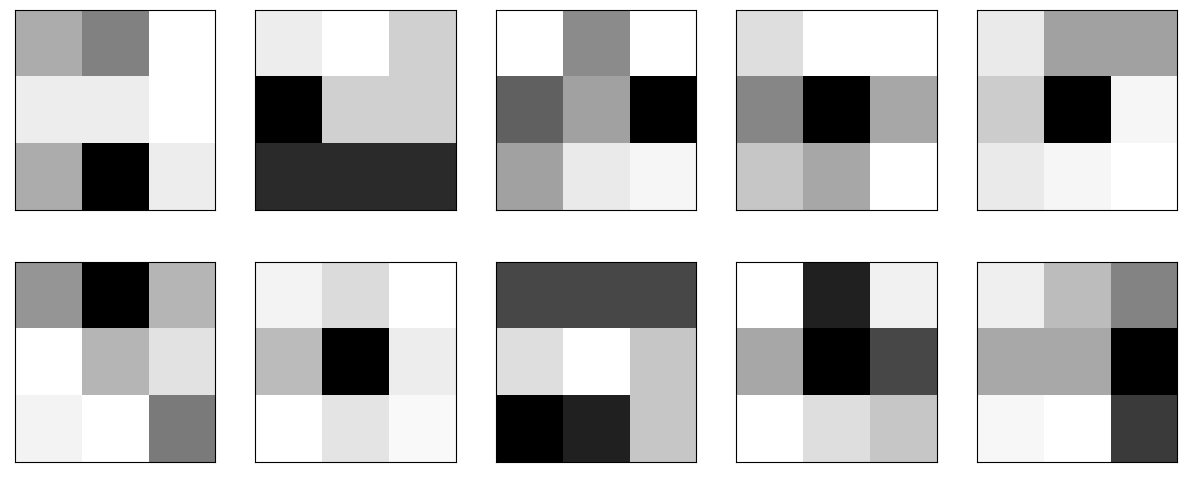

In [15]:
_ = tpc_utils.visualize_random_docs(words, sqrt_N_vocab)

Topic-Visualization as heatmaps of topic-word-prevalence

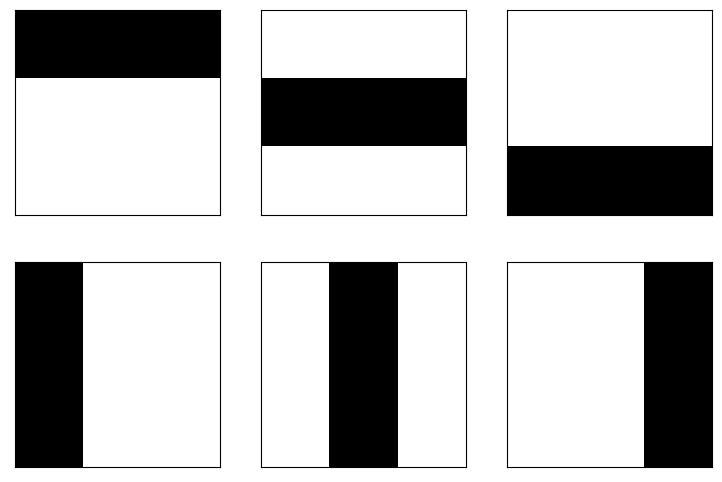

In [16]:
_ = tpc_utils.visualize_topics(topics, 2, sqrt_N_vocab)

---

## Standard Gibbs sampling - Fixed Document Length

In [17]:
## Extracting Observable Data (words only)
*_, words = data_fixed_N.extract_params()

In [21]:
model_fixed_n = tpc_sampler.gibbsSampler(K_topics=2*sqrt_N_vocab, fit_procedure="standard")
model_fixed_n.fit(words, N_iter=100), # n_batch=100, n_epochs=100, verbose=1)

100%|██████████| 100/100 [00:02<00:00, 41.57it/s]


(None,)

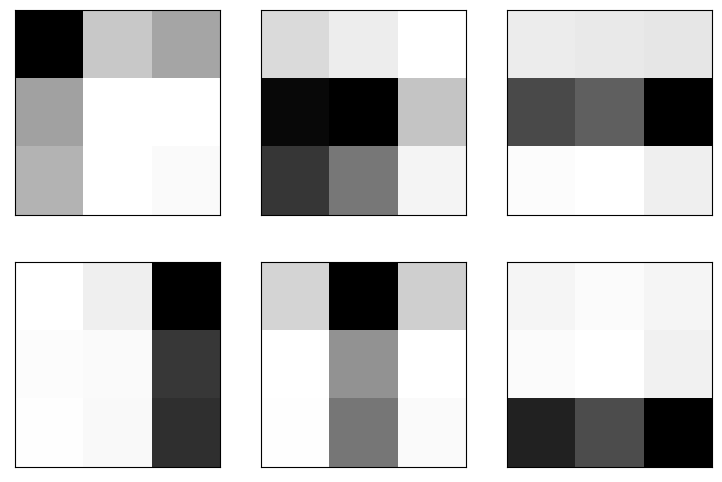

In [22]:
fig = tpc_utils.visualize_topics(model_fixed_n.Theta, 2, sqrt_N_vocab)

---------------------------

## Presenting `gibbsSampler.predict()` - Method

In [10]:
data_test  = tp_data.squareLDDocuments(
    N_docs=10, 
    sqrt_N_vocab=sqrt_N_vocab, 
    N_words_rate=N_words,
    Theta_overwrite=model_fixedN.Theta,
    alpha=1.)

In [11]:
Theta_test, Pi_test, _, _, W_DId_test = data_test.extract_params()

100%|██████████| 19/19 [00:01<00:00, 11.84it/s]


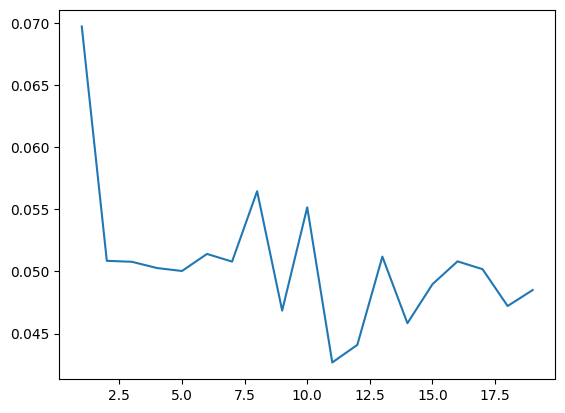

In [12]:
errs    = []
N_iters = []

for N_iter in tqdm(range(1, 20)):
    Pi_pred = model_fixedN.predict(W_DId_test, N_iter=N_iter)
    errs.append(np.mean(np.abs(Pi_pred - Pi_test)))
    N_iters.append(N_iter)

plt.plot(N_iters, errs)